<a href="https://colab.research.google.com/github/zal-developer/Time_Series_Cores/blob/main/PREPARING_TIME_SERIES_FROM_WIDE_FORM_DATA_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

Load in the Zillow Home Value Index dataframe.

In [ ]:
#loading data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
df = pd.read_csv(url)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


Filter the 4 largest cities into a new dataframe

In [ ]:
# Filter the 4 largest cities
largest_cities = df[df['SizeRank'].isin([0, 1, 2, 3])]
largest_cities

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


Melt the data to long-form and prepare it for time series analysis.

In [ ]:
#melting data
melted = pd.melt(largest_cities, id_vars=['RegionID','SizeRank','RegionName','RegionType','StateName','State','Metro','CountyName'] )
melted


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,variable,value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


Convert the melted dates into datetime datatype

In [ ]:
#dropping columns and assigning names
melted = pd.melt(largest_cities.drop(columns=['RegionID','State','CountyName','RegionType']),
                 id_vars=['SizeRank','RegionName','StateName','Metro',],
                var_name="Date")
melted

,SizeRank,RegionName,StateName,Metro,Date,value
0,0,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",2000-01-31,253690.0
1,1,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",2000-01-31,234181.0
2,2,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",2000-01-31,109068.0
3,3,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",2000-01-31,166139.0
4,0,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",2000-02-29,255517.0
...,...,...,...,...,...,...
1087,3,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",2022-08-31,315587.0
1088,0,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",2022-09-30,781622.0
1089,1,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",2022-09-30,966595.0
1090,2,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",2022-09-30,272639.0


In [ ]:
#changing date to datetime
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SizeRank    1092 non-null   int64         
 1   RegionName  1092 non-null   object        
 2   StateName   1092 non-null   object        
 3   Metro       1092 non-null   object        
 4   Date        1092 non-null   datetime64[ns]
 5   value       1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 51.3+ KB


Make the datetime column the index.

In [ ]:
#setting date as index of df
melted = melted.set_index("Date")
melted

,SizeRank,RegionName,StateName,Metro,value
Date,,,,,
2000-01-31,0,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",253690.0
2000-01-31,1,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",234181.0
2000-01-31,2,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",109068.0
2000-01-31,3,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",166139.0
2000-02-29,0,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",255517.0
...,...,...,...,...,...
2022-08-31,3,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",315587.0
2022-09-30,0,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",781622.0
2022-09-30,1,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",966595.0


Resample the dataframe as monthly frequency, grouped by City.


In [ ]:
# Resample at monthly frequency, grouped by city
monthly_resampled_df = melted.groupby('RegionName').resample('M').sum()

# Display the first few rows of the resampled DataFrame
monthly_resampled_df

SizeRank RegionName StateName  \
RegionName Date                                        
Chicago    2000-01-31         3    Chicago        IL   
           2000-02-29         3    Chicago        IL   
           2000-03-31         3    Chicago        IL   
           2000-04-30         3    Chicago        IL   
           2000-05-31         3    Chicago        IL   
...                         ...        ...       ...   
New York   2022-05-31         0   New York        NY   
           2022-06-30         0   New York        NY   
           2022-07-31         0   New York        NY   
           2022-08-31         0   New York        NY   
           2022-09-30         0   New York        NY   

                                                       Metro     value  
RegionName Date                                                         
Chicago    2000-01-31     Chicago-Naperville-Elgin, IL-IN-WI  166139.0  
           2000-02-29     Chicago-Naperville-Elgin, IL-IN-WI  166536.0  
           2000-03-31     Chicago-Naperville-Elgin, IL-IN-WI  167368.0  
           2000-04-30     Chicago-Naperville-Elgin, IL-IN-WI  168826.0  
           2000-05-31     Chicago-Naperville-Elgin, IL-IN-WI  170499.0  
...                                                      ...       ...  
New York   2022-05-31  New York-Newark-Jersey City, NY-NJ-PA  768797.0  
           2022-06-30  New York-Newark-Jersey City, NY-NJ-PA  773944.0  
           2022-07-31  New York-Newark-Jersey City, NY-NJ-PA  777692.0  
           2022-08-31  New York-Newark-Jersey City, NY-NJ-PA  779960.0  
           2022-09-30  New York-Newark-Jersey City, NY-NJ-PA  781622.0  

[1092 rows x 5 columns]

PART 2

### Plot the home values for all 4 cities. (Hint: use unstack)

Make sure to add a title and axis labels.

Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")

<ipython-input-9-cc1f9d286b1c>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}K'.format(x / 1000) for x in ax.get_yticks()])


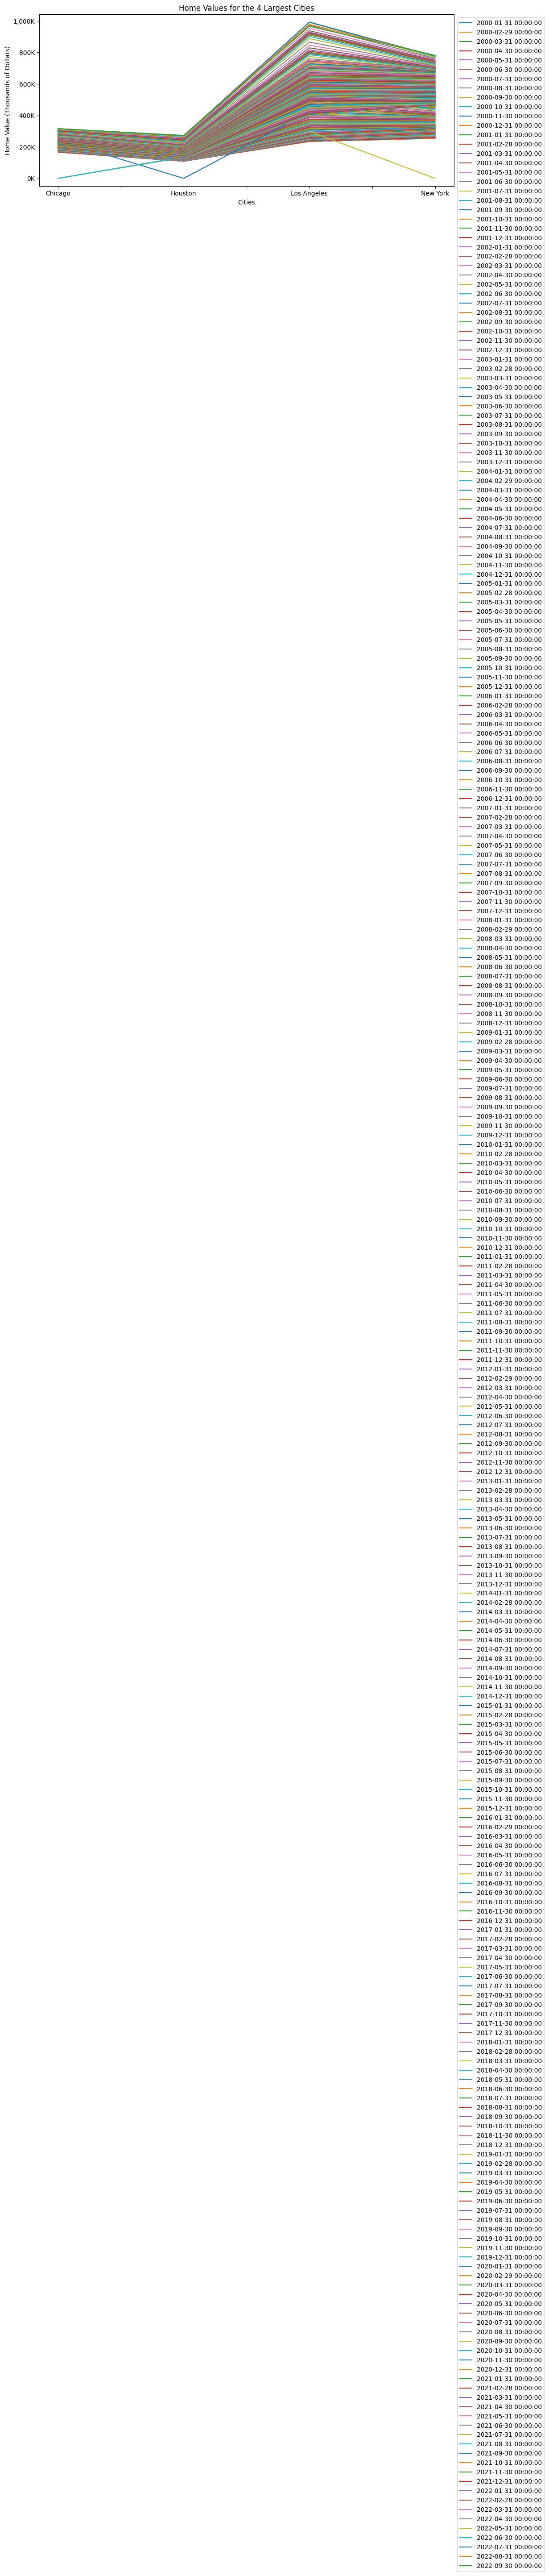

In [ ]:
# Unstack the dataframe to have cities as columns
df_unstacked = monthly_resampled_df.unstack()

# Plot the home values for all 4 cities
ax = df_unstacked['value'].plot(title='Home Values by City', figsize=(12, 5))

# Add axis labels
ax.set_title('Home Values for the 4 Largest Cities')
ax.set_xlabel('Cities')
ax.set_ylabel('Home Value (Thousands of Dollars)')

# Reformat the y-axis tick
ax.set_yticklabels(['{:,.0f}K'.format(x / 1000) for x in ax.get_yticks()])
ax.legend(bbox_to_anchor=[1,1]);
# Show the plot
plt.show()

1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex.

In [ ]:
df_unstacked.head()

,level_0,Date,0
0,SizeRank,2008-12-31,0
1,SizeRank,2008-12-31,1
2,SizeRank,2008-12-31,3
3,SizeRank,2008-12-31,2
4,RegionName,2008-12-31,New York


In [ ]:
df_ts = pd.DataFrame(melted)
df_ts.loc['2008-01':'2008-12', :]

,SizeRank,RegionName,StateName,Metro,value
Date,,,,,
2008-01-31,0,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",546538.0
2008-01-31,1,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",603029.0
2008-01-31,2,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",138208.0
2008-01-31,3,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",300207.0
2008-02-29,0,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",546098.0
2008-02-29,1,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",596635.0
2008-02-29,2,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",137512.0
2008-02-29,3,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",296063.0
2008-03-31,0,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",544562.0


In [ ]:
#finding cities with highest and lowest home values
df_2008 = df_ts.loc['2008-12', :].sort_values(by='value', ascending=False)
highest_city = df_2008.iloc[0]['RegionName']
lowest_city = df_2008.iloc[-1]['RegionName']
print(f"City with highest typical home value in 2008: {highest_city}")
print(f"City with lowest typical home value in 2008: {lowest_city}")

City with highest typical home value in 2008: New York
City with lowest typical home value in 2008: Houston


 How much did the home values change from November 2008 to December 2008 (in dollars)?

Hint: you can use .diff() to calculate the change in values

In [ ]:
#finding change in home value
df_ts.loc['2008-11':'2008-12', :]
home_value_change = df_ts.loc['2008-11':'2008-12', :]['value'].diff()
average_change = home_value_change.mean()
print(f"Average change in home values from November to December 2008: ${average_change:.2f}")

Average change in home values from November to December 2008: $-35637.29
